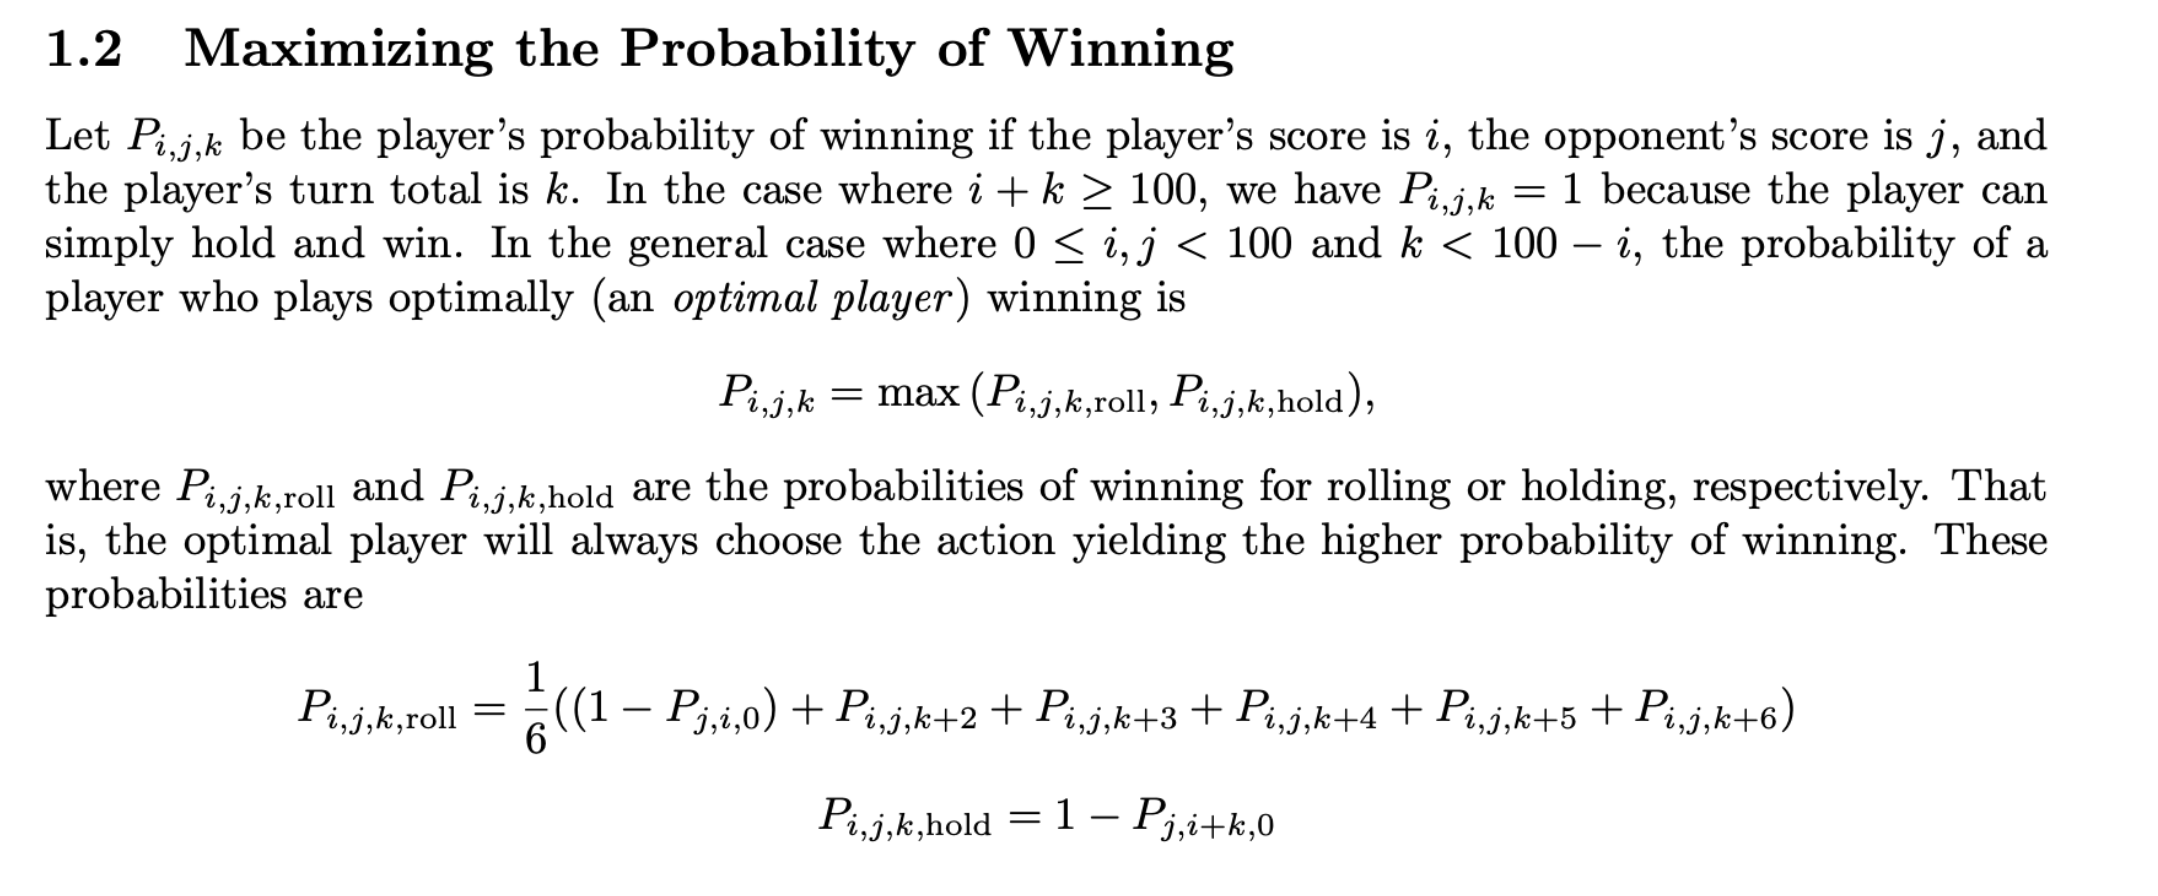

In [1]:
from functools import lru_cache

In [2]:
@lru_cache
def P(i,j,k,action=None):
    # i = player's score
    # j = opponent's score
    # k = turn score
    # action = "roll", "hold", None
    
    goal=20
    
    if action is None:
        if i+k>=goal:
            return 1.0  # certain I've won
        
        if j>=goal:
            return 0.0  # certain I've lost
        
        return max(P(i,j,k,"hold"),P(i,j,k,"roll"))
    
    if action == "hold":  # may have to do "progressive Pig" here
        if k==0:  # progressive pig
            k=1
        return 1-P(j,i+k,0)
    elif action == "roll":
        prob=1/6*P(i,j,k+2) + 1/6*P(i,j,k+3) + 1/6*P(i,j,k+4) + 1/6*P(i,j,k+5) + 1/6*P(i,j,k+6)
        prob+= 1/6*(1-P(j,i+1,0))  # progressive pig
        return prob
        
    else:
        raise ValueError("You can't get there from here.  "+str(action))
    

In [4]:
P(0,0,0,"roll")


KeyboardInterrupt



In [ ]:
P(5,0,0,"hold")

In [17]:
import sys
sys.setrecursionlimit(25000)

In [20]:
@lru_cache(maxsize=None)
def P(i,j,k,action=None):
    # i = player's score
    # j = opponent's score
    # k = turn score
    
    goal=100
    

    if action is None:
        if i+k>=goal:
            return 1.0
        if j>=goal:
            return 0.0
        
        return max(P(i,j,k,"roll"),P(i,j,k,"hold"))
    
    if action=="hold":
        reward=max(k,1)  # add one for a hold to move the game along, otherwise we have infinite games
        return 1-P(j,i+reward,0)
    
    if action=="roll":
        prob=1/6*P(i,j,k+2) + 1/6*P(i,j,k+3) + 1/6*P(i,j,k+4) + 1/6*P(i,j,k+5) + 1/6*P(i,j,k+6)

        # except to roll a 1
        prob+=1/6*(1-P(j,i+1,0))
        
        return prob
    
    raise ValueError("you can't get there from here:" + str(action))

In [21]:
P(0,0,0,"hold"),P(0,0,0,"roll")

(0.4735756335969705, 0.5338613876961484)

In [26]:
turn_score=18
P(8,0,turn_score,"hold"),P(8,0,turn_score,"roll")

(0.6672319828811903, 0.6711105331110379)

In [14]:
P(17,12,0,"hold"),P(17,12,0,"roll")

(0.31554633122491504, 0.8669117866270667)